# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 


|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [7]:
df = pd.read_csv("data/data.csv") 
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

Look at some basic statistics for numerical variables.

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)



In [10]:
cred_hist = df.Credit_History[df.Credit_History == 1].count()
print(f'Total applicants: {len(df)} \nApplicants with Credit History: {(cred_hist/len(df))*100}%')

Total applicants: 614 
Applicants with Credit History: 77.36156351791531%


2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

**Answer:** There are outliers of applicants with income of more than $2000 and coapplicants of income more than $1000.


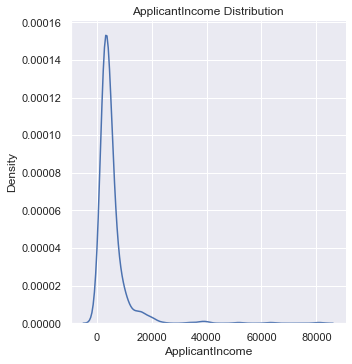

In [11]:
sns.displot(df.ApplicantIncome, kind='kde').set(title='ApplicantIncome Distribution');

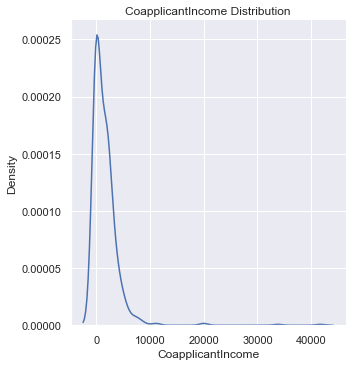

In [12]:
sns.displot(df.CoapplicantIncome, kind='kde').set(title='CoapplicantIncome Distribution');

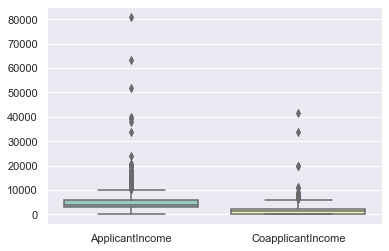

In [13]:
inc = df[['ApplicantIncome','CoapplicantIncome']]
ax = sns.boxplot(data=inc, orient="v", palette="Set3")

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [14]:
print(df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']].skew(axis = 0, skipna = True))

## Applicant and Coapplicant Incomes are highly skewed to the right.

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [15]:
cat = df.copy()
cat = cat.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [16]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

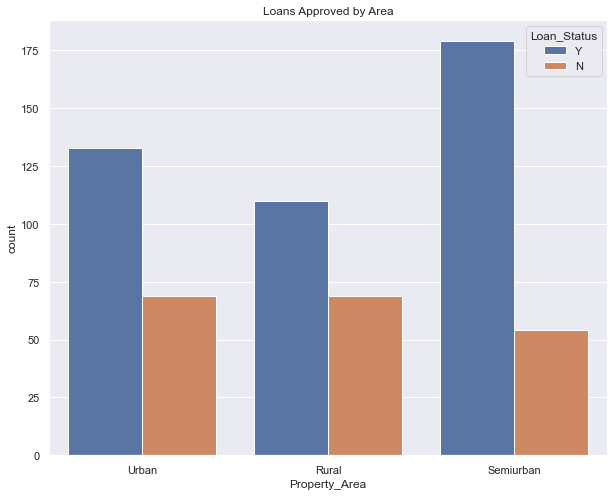

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x="Property_Area", hue="Loan_Status", data=df).set(title='Loans Approved by Area')
plt.savefig('img/Loans_Area_Frequencies.png');

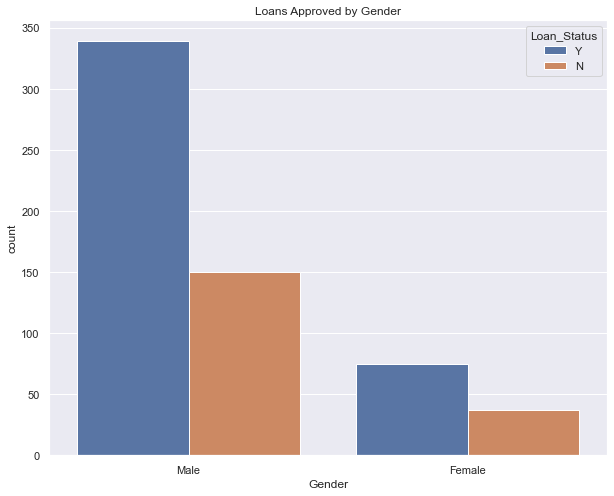

In [37]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x="Gender", hue="Loan_Status", data=df).set(title='Loans Approved by Gender')
plt.savefig('img/Loans_Gender_Frequencies.png');

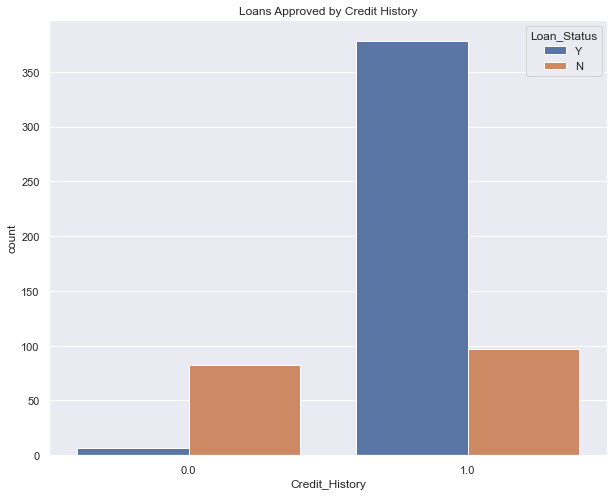

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x="Credit_History", hue="Loan_Status", data=df).set(title='Loans Approved by Credit History')
plt.savefig('img/Loans_Credit_Frequencies.png');

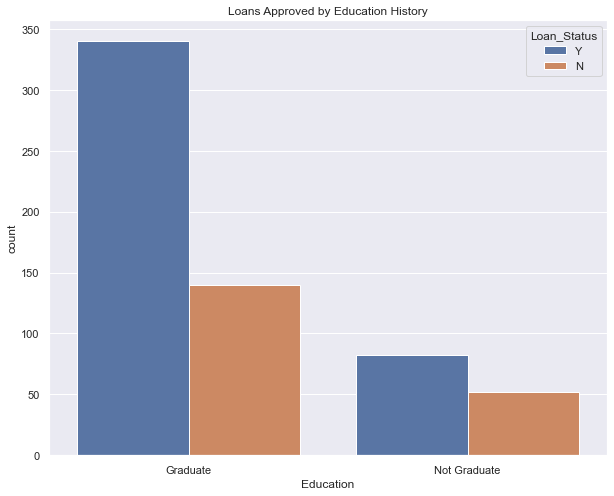

In [38]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x="Education", hue="Loan_Status", data=df).set(title='Loans Approved by Education History')
plt.savefig('img/Loans_Education_Frequencies.png');

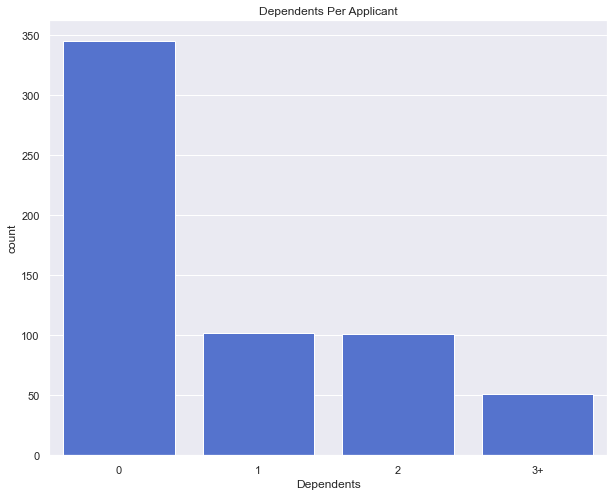

In [23]:
sns.countplot(x=df.Dependents, color='royalblue').set(title='Dependents Per Applicant');

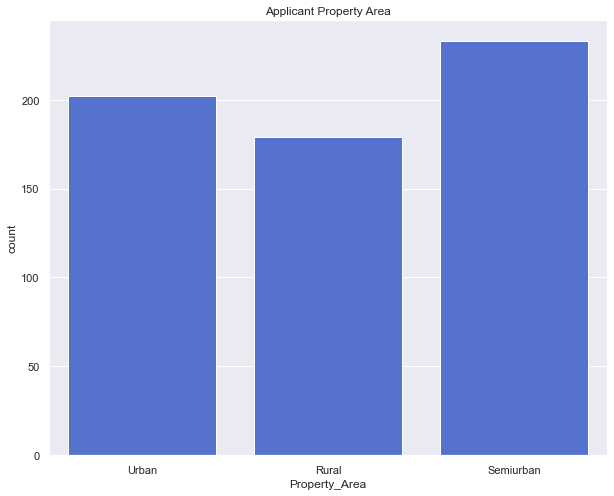

In [24]:
sns.countplot(x=df.Property_Area, color='royalblue').set(title='Applicant Property Area');

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



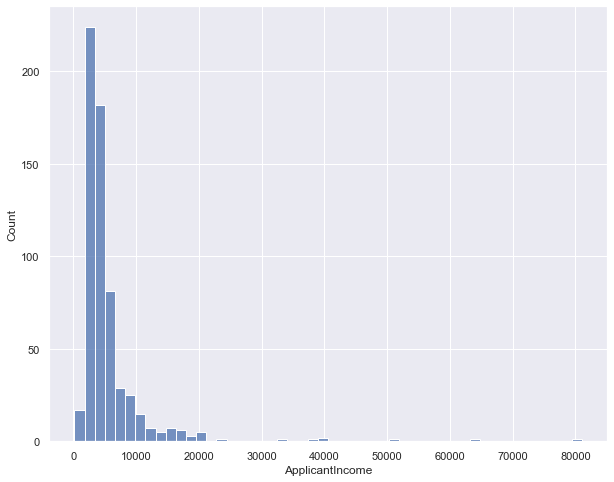

In [25]:
sns.histplot(df.ApplicantIncome, bins=50);


Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

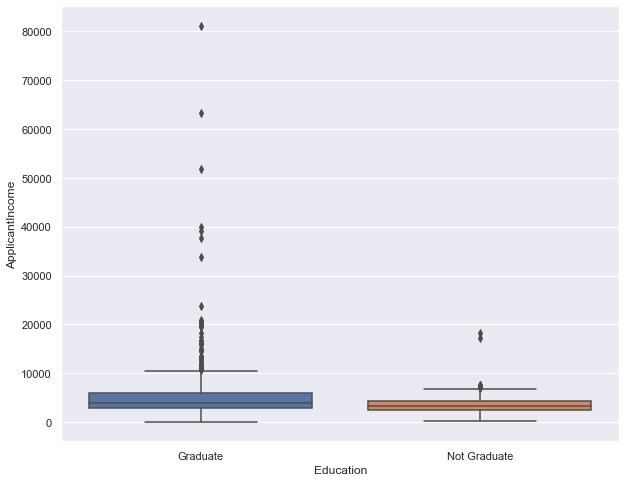

In [30]:
sns.boxplot(data=df, x="Education", y="ApplicantIncome", orient='v');
plt.savefig('img/Education_Income_Frequencies.png');

Look at the histogram and boxplot of LoanAmount

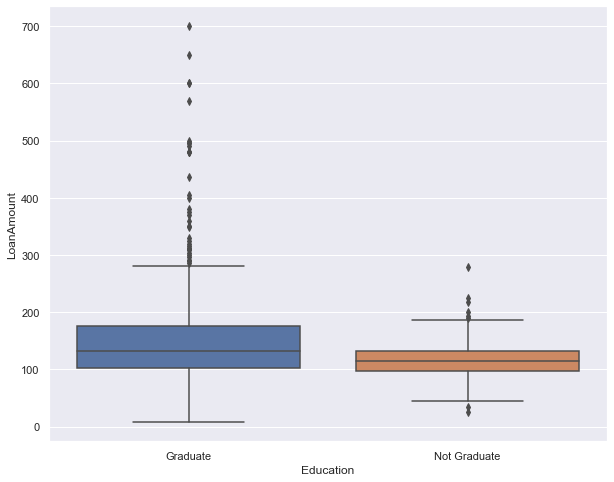

In [31]:
sns.boxplot(data=df, x="Education", y="LoanAmount", orient='v');
plt.savefig('img/Education_Loan_Amount.png');

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [40]:
table1 = pd.pivot_table(df, values = 'ApplicantIncome', index=['Education'],
                     columns='Gender',aggfunc=np.median)
table1

Gender,Female,Male
Education,,
Graduate,3638.5,4166.0
Not Graduate,3208.5,3357.0


In [39]:
table2 = pd.pivot_table(df, values = 'LoanAmount', index=['Education'],
                     columns='Gender',aggfunc=np.median)
table2

Gender,Female,Male
Education,,
Graduate,113.0,136.0
Not Graduate,102.0,115.0
